In [2]:
import os
import glob
import pandas as pd

curfolder = os.getcwd()
features = curfolder + '\\..\\07_TS_featureExtraction\\Datasets\\'
dfs = glob.glob(features + '*.csv') 

In [7]:
sample = dfs[1]
df = pd.read_csv(sample)

In [4]:
df

,arm_duration,arm_inter_Kin,arm_inter_IK,arm_bbmv,arm_bbmv_rate,lowerbody_duration,lowerbody_inter_Kin,lowerbody_inter_IK,lowerbody_bbmv,lowerbody_bbmv_rate,...,modality,correction,answer_fol,answer_fol_dist,answer_prev,answer_prev_dist,expressibility,response_time_sec,concept_id,correction_info
0,3760.0,28.149240,30.017435,-1.859849,-0.000495,3322.0,27.440195,28.521148,-6.577333,-0.001980,...,gebaren,c0,vogel,1.000000,NaN,NaN,0.796,4.951569,vogel_gebaren_p0,c0_only
1,5824.0,29.469840,30.833535,0.250250,0.000043,5946.0,29.512191,31.374474,-1.087982,-0.000183,...,gebaren,c0,kruipen,1.000000,NaN,NaN,0.808,2.888422,kruipen_gebaren_p0,c0_only
2,4538.0,29.540275,30.614714,-2.068191,-0.000456,4308.0,28.621588,28.383534,-8.086294,-0.001877,...,gebaren,c0,drinken,0.384780,NaN,NaN,0.560,7.361054,water_gebaren_p0,c0
3,4758.0,28.841040,30.474840,-2.150583,-0.000452,4242.0,28.499463,29.405677,-7.696432,-0.001814,...,gebaren,c1,waterval,0.453195,drinken,0.384780,0.560,5.738022,water_gebaren_p0,c1
4,4574.0,28.841029,30.475538,-2.626923,-0.000574,3822.0,28.321166,29.018108,-7.706197,-0.002016,...,gebaren,c2,water,1.000000,waterval,0.453195,0.560,5.751086,water_gebaren_p0,c2
5,5954.0,30.169922,31.804769,-1.775415,-0.000298,5762.0,30.080733,29.812870,-6.688649,-0.001161,...,gebaren,c0,vuur,1.000000,NaN,NaN,0.613,2.371205,vuur_gebaren_p0,c0_only
6,2704.0,26.941429,26.879425,-5.670292,-0.002097,NaN,NaN,NaN,NaN,NaN,...,gebaren,c0,top,0.108447,NaN,NaN,0.690,6.318433,goed_gebaren_p0,c0
7,4250.0,29.455030,29.475774,-4.099438,-0.000965,NaN,NaN,NaN,NaN,NaN,...,gebaren,c1,goed,1.000000,top,0.108447,0.690,3.261077,goed_gebaren_p0,c1
8,2474.0,26.968241,28.292222,-4.872051,-0.001969,1286.0,24.928558,24.932559,-10.762294,-0.008369,...,gebaren,c0,horen,1.000000,NaN,NaN,0.756,4.287785,horen_gebaren_p0,c0_only
9,4640.0,29.235632,30.165502,-2.576503,-0.000555,4196.0,28.619188,28.463191,-6.874801,-0.001638,...,gebaren,c0,wijzen,0.157925,NaN,NaN,0.578,9.756743,ver_gebaren_p0,c0


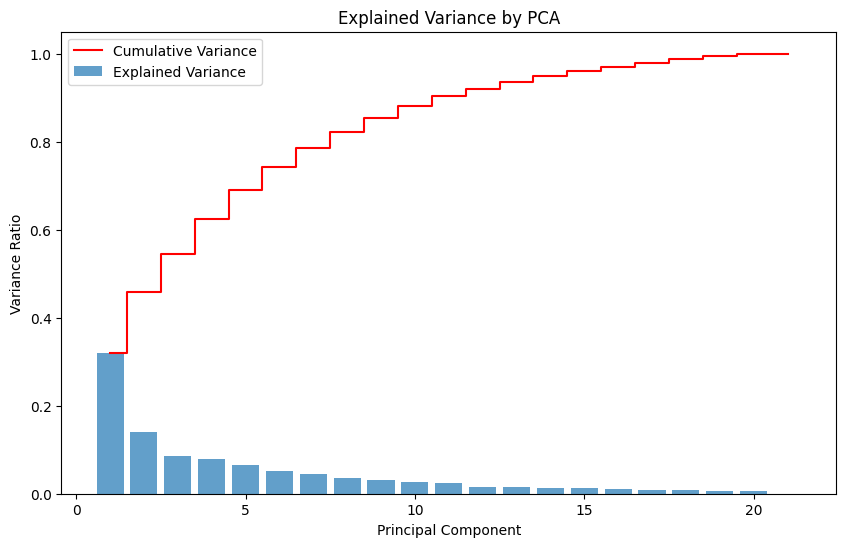

Number of components explaining 95.0% variance: 15

Feature Contributions to Principal Components:
      arm_duration  arm_inter_Kin  arm_inter_IK  arm_bbmv  arm_bbmv_rate  \
PC1       0.049248       0.047188      0.054380  0.068001       0.064075   
PC2       0.075865       0.072061      0.065220 -0.020781       0.021523   
PC3      -0.058810      -0.046308     -0.025612  0.008216      -0.021964   
PC4       0.029130       0.020146      0.024094  0.043660       0.029829   
PC5      -0.006329      -0.014518     -0.022136 -0.005003      -0.014734   
PC6      -0.031691      -0.073419     -0.081986 -0.082980      -0.099439   
PC7       0.031554       0.049352      0.033574 -0.022336       0.001390   
PC8      -0.000691       0.037924      0.011464 -0.007399       0.004140   
PC9      -0.041104      -0.030454     -0.012463  0.033588      -0.011135   
PC10     -0.033397       0.012691     -0.023995  0.015960       0.002192   
PC11      0.051057       0.038319     -0.014216  0.041811       0

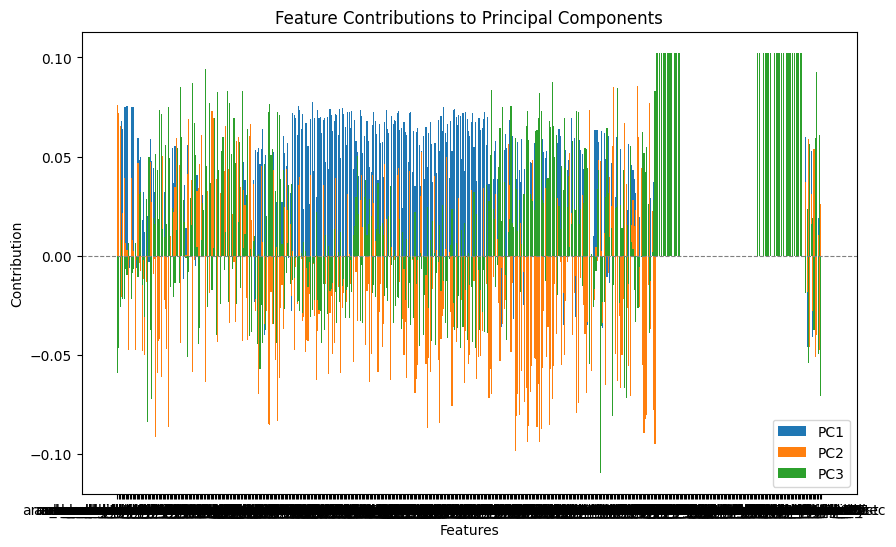

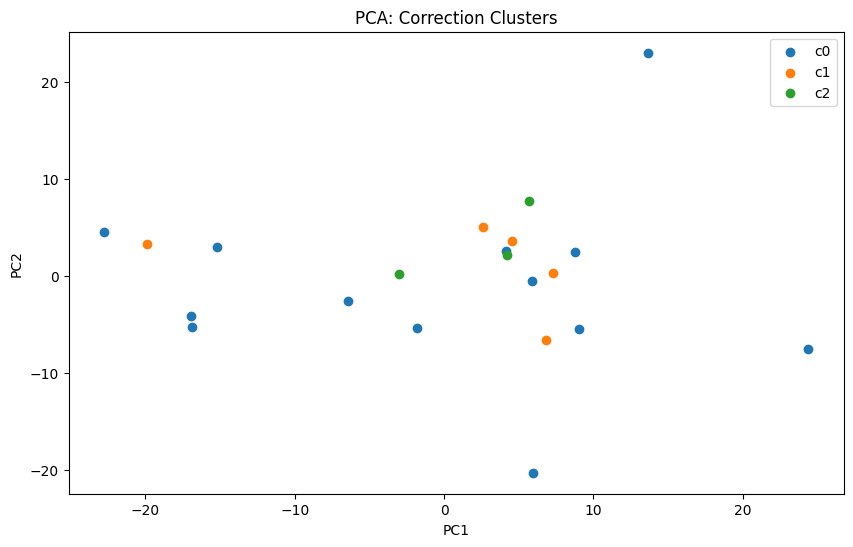

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# only numerical cols
data = df.select_dtypes(include=[np.number])

# replace nan by 0
data = data.fillna(0)

# Separate features and labels
features = data
labels = df['correction']

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Perform PCA
pca = PCA()
pca_result = pca.fit_transform(features_scaled)

# Explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot explained variance
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, label='Explained Variance')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', label='Cumulative Variance', color='red')
plt.ylabel('Variance Ratio')
plt.xlabel('Principal Component')
plt.title('Explained Variance by PCA')
plt.legend()
plt.show()

# Determine the number of significant components (e.g., 95% of variance)
threshold = 0.95
num_components = np.argmax(cumulative_variance >= threshold) + 1
print(f"Number of components explaining {threshold*100}% variance: {num_components}")

# Feature contributions to each principal component
feature_contributions = pd.DataFrame(
    pca.components_,
    columns=features.columns,
    index=[f'PC{i+1}' for i in range(len(pca.components_))]
)

print("\nFeature Contributions to Principal Components:")
print(feature_contributions)

# Identify most contributing features for each principal component
top_contributors = feature_contributions.apply(lambda row: row.nlargest(3).index.tolist(), axis=1)
print("\nTop contributing features per component:")
print(top_contributors)

# Visualize feature contributions for the top components
plt.figure(figsize=(10, 6))
for i in range(min(3, len(feature_contributions))):  # Plot the first 3 components
    plt.bar(features.columns, feature_contributions.iloc[i], label=f'PC{i+1}')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.xlabel('Features')
plt.ylabel('Contribution')
plt.title('Feature Contributions to Principal Components')
plt.legend()
plt.show()

# Optional: Project data to principal components to analyze corrections
pca_df = pd.DataFrame(pca_result, columns=[f'PC{i+1}' for i in range(len(pca.components_))])
pca_df['Correction'] = labels

# Visualize PCA results (e.g., PC1 vs PC2)
plt.figure(figsize=(10, 6))
for correction in pca_df['Correction'].unique():
    subset = pca_df[pca_df['Correction'] == correction]
    plt.scatter(subset['PC1'], subset['PC2'], label=correction)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA: Correction Clusters')
plt.legend()
plt.show()
